In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [2]:
df = pd.read_csv('IoT_Dataset.csv')

df = df.drop(['Protocol Type', 'Weight', ], axis=1)

columns_to_normalize = df.columns.difference(['label'])

scaler = StandardScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df

,flow_duration,Header_Length,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,label
0,-0.077393,-0.186597,-0.184691,-0.092878,-0.092878,-0.003041,3.260593,-0.504896,3.202325,-0.310826,...,-0.298242,-0.213020,-0.296919,0.010592,0.003702,-0.326852,-0.212808,-0.080999,-0.421734,DDoS-RSTFINFlood
1,-0.077393,-0.186591,-0.184691,-0.092838,-0.092838,-0.003041,-0.306693,-0.504896,-0.312273,-0.310826,...,-0.295218,-0.198182,-0.285454,-0.011408,0.003702,-0.318921,-0.197905,-0.080696,-0.216267,DoS-TCP_Flood
2,-0.077393,-0.186703,-0.184691,-0.092549,-0.092549,-0.003041,-0.306693,-0.504896,-0.312273,-0.310826,...,-0.343820,-0.213020,-0.342173,-0.000774,0.003702,-0.461351,-0.212808,-0.080999,-0.421734,DDoS-ICMP_Flood
3,-0.068059,-0.036911,-0.184691,-0.046679,-0.046679,-0.003041,-0.306693,-0.504896,-0.312273,-0.310826,...,-0.313435,-0.213020,-0.312003,-0.006688,0.003702,-0.369849,-0.212808,-0.080999,-0.421734,DoS-UDP_Flood
4,-0.074056,-0.186503,-0.069762,-0.092819,-0.092819,-0.003041,-0.306693,1.980606,-0.312273,-0.310826,...,-0.245223,-0.091539,-0.282286,-0.008936,0.003702,-0.222228,-0.091225,-0.075313,0.359042,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240208,0.438772,-0.184326,1.445972,-0.092835,-0.092835,-0.003041,-0.306693,-0.504896,-0.312273,-0.310826,...,0.167882,0.168033,0.038719,-4.378236,-4.379629,0.586243,0.168223,-0.069733,3.276678,BenignTraffic
240209,-0.051503,-0.149426,-0.208760,-0.092658,-0.092658,-0.003041,-0.306693,-0.504896,-0.312273,-0.310826,...,6.131028,7.996734,5.984033,-4.378236,-4.379629,4.738855,7.996490,5.378732,3.276678,BenignTraffic
240210,1.767370,0.063276,2.089812,-0.092647,-0.092647,-0.003041,-0.306693,-0.504896,-0.312273,-0.310826,...,-0.211455,0.048232,-0.183028,4.390734,4.387032,-0.106229,0.048892,-0.076300,3.687612,BenignTraffic
240211,-0.022727,0.026225,2.017606,-0.091154,-0.091154,-0.003041,-0.306693,-0.504896,-0.312273,-0.310826,...,0.084176,0.736243,1.584539,4.390685,4.387032,0.393056,0.714956,0.078196,3.687612,BenignTraffic


In [3]:
remap_labels = {
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'MITM-ArpSpoofing': 'Spoofing',
    'BenignTraffic': 'Benign'
}

df_five = df.copy()

df_five['label'] = df_five['label'].apply(lambda x: remap_labels.get(x, x))
df_five['label'].value_counts()


label
DDoS        173502
DoS          40862
Mirai        13435
Benign       10800
Spoofing      1614
Name: count, dtype: int64

In [4]:
# Copy the original DataFrame
df_two = df.copy()

# Remap labels to 'Malignant' except for 'Benign'
df_two['label'] = df_two['label'].apply(lambda x: 'Malignant' if x != 'BenignTraffic' else 'BenignTraffic')
df_two['label'] = df_two['label'].replace('BenignTraffic', 'Benign')


df_two['label'].value_counts()


label
Malignant    229413
Benign        10800
Name: count, dtype: int64

In [5]:
def filter(df, num):
    # Use sample to randomly pick data; if less than num, take all available
    return df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=min(len(x), num), random_state=1))


In [6]:
df = filter(df, 1500)
print(df.value_counts('label'))

label
BenignTraffic              1500
DDoS-ACK_Fragmentation     1500
Mirai-greip_flood          1500
Mirai-greeth_flood         1500
MITM-ArpSpoofing           1500
DoS-UDP_Flood              1500
DoS-TCP_Flood              1500
DoS-SYN_Flood              1500
DDoS-UDP_Flood             1500
DDoS-TCP_Flood             1500
DDoS-SynonymousIP_Flood    1500
DDoS-SYN_Flood             1500
DDoS-RSTFINFlood           1500
DDoS-PSHACK_Flood          1500
DDoS-ICMP_Fragmentation    1500
DDoS-ICMP_Flood            1500
Mirai-udpplain             1500
DDoS-UDP_Fragmentation     1484
Name: count, dtype: int64


/var/folders/j6/j01pjtws3wz8trc81d7tsblh0000gn/T/ipykernel_31633/2075271295.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=min(len(x), num), random_state=1))


In [7]:
df_five = filter(df_five, 1500)
print(df_five.value_counts('label'))

df_two = filter(df_two, 4500)
print(df_two.value_counts('label'))

label
Benign      1500
DDoS        1500
DoS         1500
Mirai       1500
Spoofing    1500
Name: count, dtype: int64
label
Benign       4500
Malignant    4500
Name: count, dtype: int64


/var/folders/j6/j01pjtws3wz8trc81d7tsblh0000gn/T/ipykernel_31633/2075271295.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('label', group_keys=False).apply(lambda x: x.sample(n=min(len(x), num), random_state=1))
/var/folders/j6/j01pjtws3wz8trc81d7tsblh0000gn/T/ipykernel_31633/2075271295.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('label', group_keys=False).ap

In [8]:
def train_and_evaluate(df, model):
    # Prepare the data
    x = df.drop('label', axis=1)
    y = df['label']

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    predictions = model.predict(x_test)
    
    # Calculate metrics
    accuracy = round(accuracy_score(y_test, predictions), 5)
    recall = round(recall_score(y_test, predictions, average='macro', zero_division=0), 5)
    precision = round(precision_score(y_test, predictions, average='macro', zero_division=0), 5)
    f1 = round(f1_score(y_test, predictions, average='macro', zero_division=0), 5)
    
    return {
        'model': model.__class__.__name__,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1_score': f1
    }

In [9]:
# Initialize models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=2000)
rand_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier(algorithm='SAMME')
bsvm = svc = SVC(C=1, kernel = "rbf", class_weight = "balanced", gamma = "scale")
gradient_boost = GradientBoostingClassifier()
xgboost = XGBClassifier(use_label_encoder=False)


# List of models
models = [knn, log_reg, rand_forest, adaboost, bsvm, gradient_boost, xgboost]


In [10]:
results_two_classes = []
for model in models:
    result = train_and_evaluate(df_two, model)
    results_two_classes.append(result)
    print(result)

{'model': 'KNeighborsClassifier', 'accuracy': 0.99556, 'recall': 0.99561, 'precision': 0.99552, 'f1_score': 0.99555}
{'model': 'LogisticRegression', 'accuracy': 0.99444, 'recall': 0.99444, 'precision': 0.99444, 'f1_score': 0.99444}
{'model': 'RandomForestClassifier', 'accuracy': 0.99667, 'recall': 0.99672, 'precision': 0.99663, 'f1_score': 0.99667}
{'model': 'AdaBoostClassifier', 'accuracy': 0.99556, 'recall': 0.99559, 'precision': 0.99553, 'f1_score': 0.99555}
{'model': 'SVC', 'accuracy': 0.99611, 'recall': 0.99616, 'precision': 0.99608, 'f1_score': 0.99611}
{'model': 'GradientBoostingClassifier', 'accuracy': 0.995, 'recall': 0.99505, 'precision': 0.99497, 'f1_score': 0.995}
{'model': 'XGBClassifier', 'accuracy': 0.99667, 'recall': 0.99671, 'precision': 0.99664, 'f1_score': 0.99667}


In [11]:
results_five_classes = []
for model in models:
    result = train_and_evaluate(df_five, model)
    results_five_classes.append(result)
    print(result)

{'model': 'KNeighborsClassifier', 'accuracy': 0.87533, 'recall': 0.87558, 'precision': 0.87701, 'f1_score': 0.87501}
{'model': 'LogisticRegression', 'accuracy': 0.83667, 'recall': 0.83824, 'precision': 0.84743, 'f1_score': 0.83603}
{'model': 'RandomForestClassifier', 'accuracy': 0.96267, 'recall': 0.9617, 'precision': 0.96436, 'f1_score': 0.96233}
{'model': 'AdaBoostClassifier', 'accuracy': 0.912, 'recall': 0.91382, 'precision': 0.92116, 'f1_score': 0.90969}
{'model': 'SVC', 'accuracy': 0.824, 'recall': 0.8288, 'precision': 0.87046, 'f1_score': 0.81755}
{'model': 'GradientBoostingClassifier', 'accuracy': 0.96667, 'recall': 0.96596, 'precision': 0.96716, 'f1_score': 0.96629}
{'model': 'XGBClassifier', 'accuracy': 0.97133, 'recall': 0.9708, 'precision': 0.97154, 'f1_score': 0.97104}


In [12]:
results_all_classes = []
for model in models:
    result = train_and_evaluate(df, model)
    results_all_classes.append(result)
    print(result)

{'model': 'KNeighborsClassifier', 'accuracy': 0.90235, 'recall': 0.90117, 'precision': 0.90266, 'f1_score': 0.90094}
{'model': 'LogisticRegression', 'accuracy': 0.8338, 'recall': 0.82952, 'precision': 0.85008, 'f1_score': 0.82507}
{'model': 'RandomForestClassifier', 'accuracy': 0.98647, 'recall': 0.98656, 'precision': 0.98673, 'f1_score': 0.98651}
{'model': 'AdaBoostClassifier', 'accuracy': 0.5416, 'recall': 0.54408, 'precision': 0.47212, 'f1_score': 0.43652}
{'model': 'SVC', 'accuracy': 0.76265, 'recall': 0.75577, 'precision': 0.79395, 'f1_score': 0.72977}
{'model': 'GradientBoostingClassifier', 'accuracy': 0.99074, 'recall': 0.99076, 'precision': 0.99074, 'f1_score': 0.9907}
{'model': 'XGBClassifier', 'accuracy': 0.99166, 'recall': 0.99172, 'precision': 0.99163, 'f1_score': 0.99163}


In [13]:
# Convert lists to DataFrames
df_2_classes = pd.DataFrame(results_two_classes)
df_5_classes = pd.DataFrame(results_five_classes)
df_44_classes = pd.DataFrame(results_all_classes)

def create_pivot_table(data, class_name):
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)

    # Melt the DataFrame
    df_melted = df.melt(id_vars='model', var_name='metric', value_name='value')

    # Create a pivot table
    df_pivot = df_melted.pivot(index='metric', columns='model', values='value')

    # Add a multi-level index with the class_name
    df_pivot.index = pd.MultiIndex.from_product([[class_name], df_pivot.index])

    return df_pivot

# Create pivot tables for each class
pivot_2_classes = create_pivot_table(df_2_classes, '2 classes')
pivot_5_classes = create_pivot_table(df_5_classes, '5 classes')
pivot_44_classes = create_pivot_table(df_44_classes, '18 classes')

# Concatenate the pivot tables into one DataFrame
combined_df = pd.concat([pivot_2_classes, pivot_5_classes, pivot_44_classes])

# Reordering the columns to match the desired order
desired_order = ['KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier', 'SVC', 'GradientBoostingClassifier', 'XGBClassifier']
# Ensure the order of columns matches the desired_order, missing columns will be filled with NaNs
combined_df = combined_df[desired_order]

combined_df


model                 KNeighborsClassifier  LogisticRegression  \
           metric                                                
2 classes  accuracy                0.99556             0.99444   
           f1_score                0.99555             0.99444   
           precision               0.99552             0.99444   
           recall                  0.99561             0.99444   
5 classes  accuracy                0.87533             0.83667   
           f1_score                0.87501             0.83603   
           precision               0.87701             0.84743   
           recall                  0.87558             0.83824   
18 classes accuracy                0.90235             0.83380   
           f1_score                0.90094             0.82507   
           precision               0.90266             0.85008   
           recall                  0.90117             0.82952   

model                 RandomForestClassifier  AdaBoostClassifier      SVC  \
           metric                                                           
2 classes  accuracy                  0.99667             0.99556  0.99611   
           f1_score                  0.99667             0.99555  0.99611   
           precision                 0.99663             0.99553  0.99608   
           recall                    0.99672             0.99559  0.99616   
5 classes  accuracy                  0.96267             0.91200  0.82400   
           f1_score                  0.96233             0.90969  0.81755   
           precision                 0.96436             0.92116  0.87046   
           recall                    0.96170             0.91382  0.82880   
18 classes accuracy                  0.98647             0.54160  0.76265   
           f1_score                  0.98651             0.43652  0.72977   
           precision                 0.98673             0.47212  0.79395   
           recall                    0.98656             0.54408  0.75577   

model                 GradientBoostingClassifier  XGBClassifier  
           metric                                                
2 classes  accuracy                      0.99500        0.99667  
           f1_score                      0.99500        0.99667  
           precision                     0.99497        0.99664  
           recall                        0.99505        0.99671  
5 classes  accuracy                      0.96667        0.97133  
           f1_score                      0.96629        0.97104  
           precision                     0.96716        0.97154  
           recall                        0.96596        0.97080  
18 classes accuracy                      0.99074        0.99166  
           f1_score                      0.99070        0.99163  
           precision                     0.99074        0.99163  
           recall                        0.99076        0.99172

Data for accuracy and 2 classes: [0.99556 0.99444 0.99667 0.99556 0.99611 0.995   0.99667]
Data for accuracy and 5 classes: [0.87533 0.83667 0.96267 0.912   0.824   0.96667 0.97133]
Data for accuracy and 18 classes: [0.90235 0.8338  0.98647 0.5416  0.76265 0.99074 0.99166]
Data for recall and 2 classes: [0.99561 0.99444 0.99672 0.99559 0.99616 0.99505 0.99671]
Data for recall and 5 classes: [0.87558 0.83824 0.9617  0.91382 0.8288  0.96596 0.9708 ]
Data for recall and 18 classes: [0.90117 0.82952 0.98656 0.54408 0.75577 0.99076 0.99172]
Data for precision and 2 classes: [0.99552 0.99444 0.99663 0.99553 0.99608 0.99497 0.99664]
Data for precision and 5 classes: [0.87701 0.84743 0.96436 0.92116 0.87046 0.96716 0.97154]
Data for precision and 18 classes: [0.90266 0.85008 0.98673 0.47212 0.79395 0.99074 0.99163]
Data for f1_score and 2 classes: [0.99555 0.99444 0.99667 0.99555 0.99611 0.995   0.99667]
Data for f1_score and 5 classes: [0.87501 0.83603 0.96233 0.90969 0.81755 0.96629 0.97104]

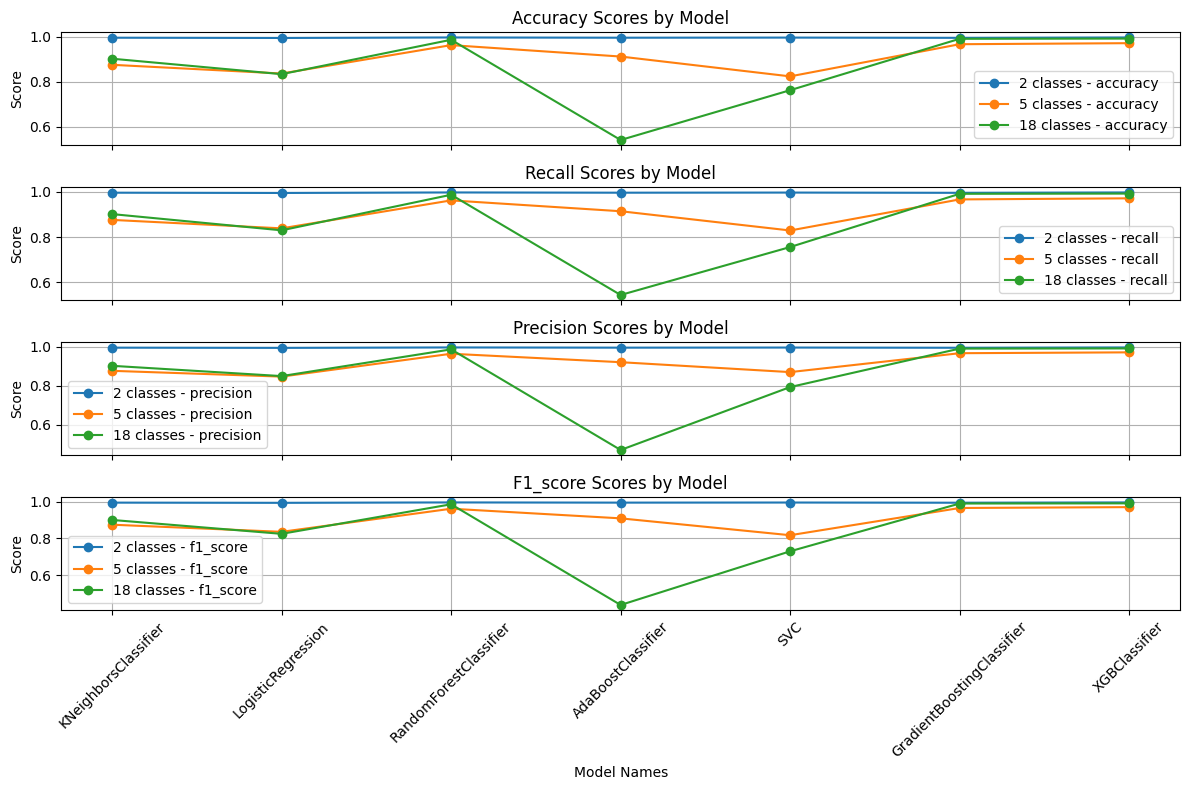

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# Get model names from the DataFrame
model_names = combined_df.columns.get_level_values(0).unique()


# Set the metrics and class categories
metrics = ['accuracy', 'recall', 'precision', 'f1_score']
class_categories = ['2 classes', '5 classes', '18 classes']

# Create subplots for each metric
fig, axs = plt.subplots(len(metrics), figsize=(12, 8), sharex=True)

# Plot each metric in its subplot
for idx, metric in enumerate(metrics):
    for class_category in class_categories:
        # Extract the data for the current metric and class category
        data = combined_df.xs(metric, level=1, axis=0).loc[class_category].values
        print(f"Data for {metric} and {class_category}: {data}")  # Debug print
        # Plot the line with a marker at each data point
        axs[idx].plot(model_names, data, marker='o', label=f'{class_category} - {metric}')

    axs[idx].set_title(f'{metric.capitalize()} Scores by Model')
    axs[idx].set_ylabel('Score')
    axs[idx].grid(True)
    axs[idx].legend()

    # axs[idx].yaxis.set_major_locator(MultipleLocator(0.05))

# Set the x-axis labels
plt.xticks(range(len(model_names)), model_names, rotation=45)
plt.xlabel('Model Names')

plt.tight_layout()
plt.show()


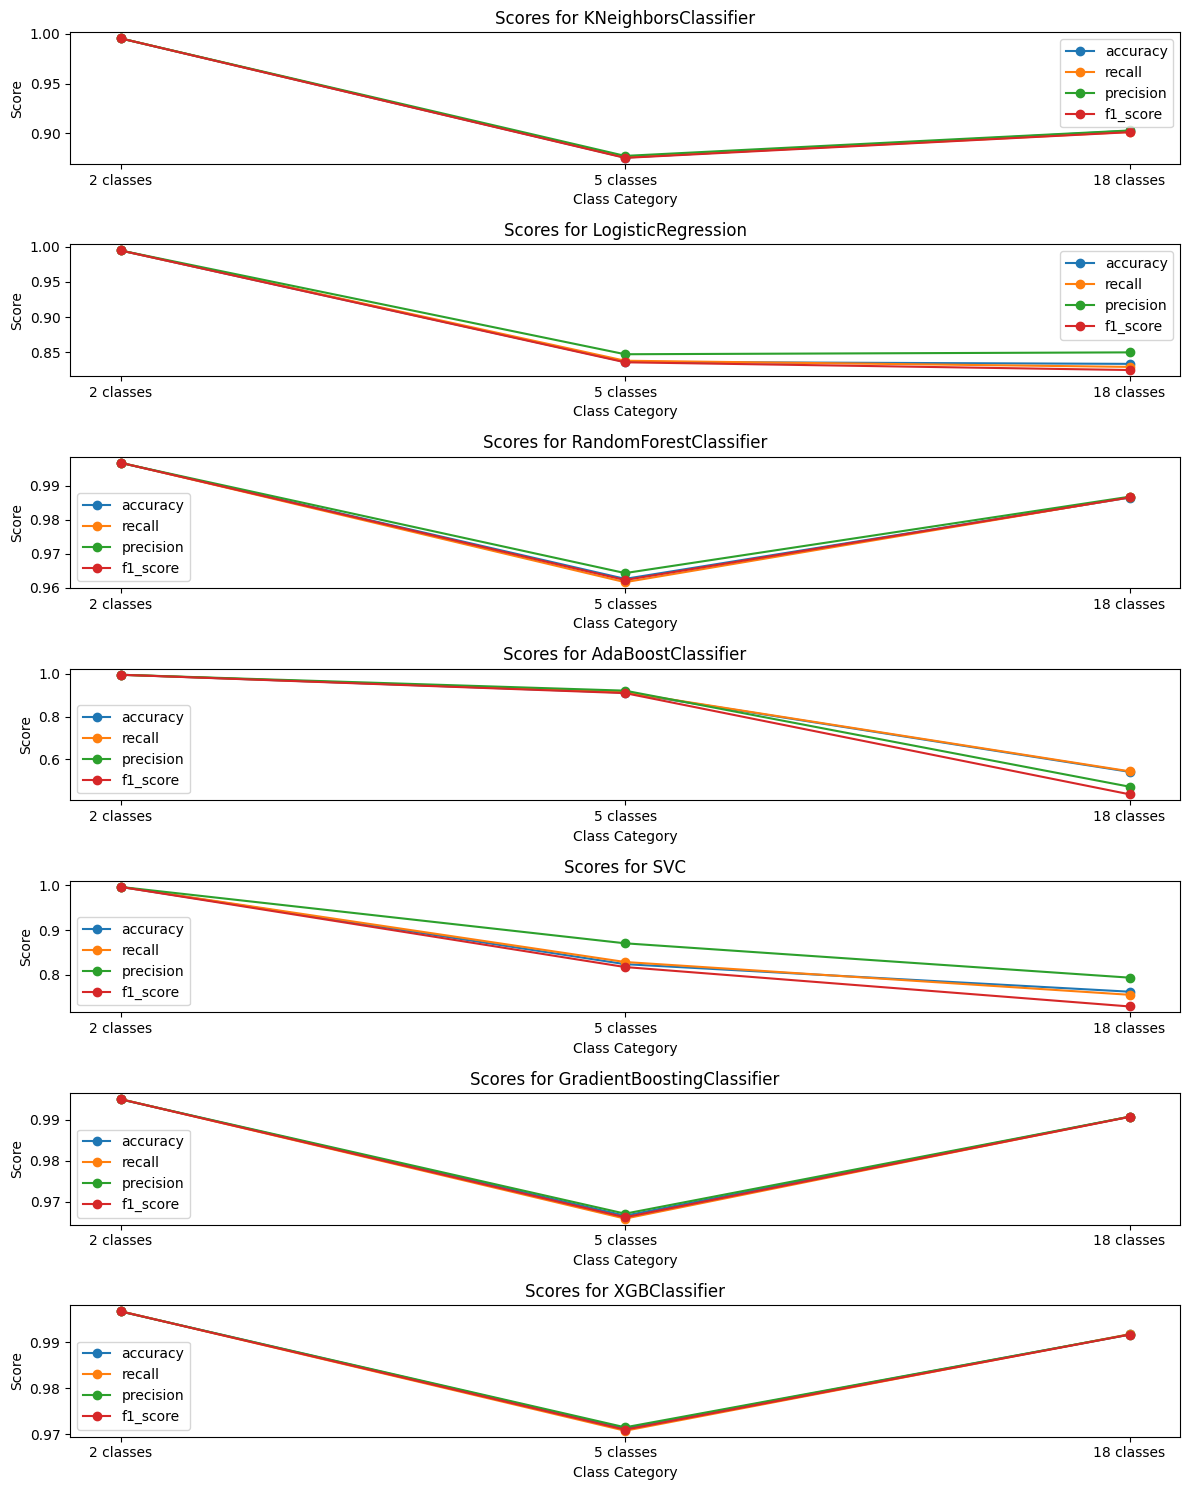

In [19]:
import matplotlib.pyplot as plt

# Assuming combined_df and other variables are already defined

# Create subplots for each model
fig, axs = plt.subplots(len(model_names), figsize=(12, 15))  # Adjusted figure size for vertical layout

# Iterate over models and plot each metric in its subplot
for idx, model_name in enumerate(model_names):
    axs[idx].set_title(f'Scores for {model_name}')

    for metric in metrics:
        data = []
        for class_category in class_categories:
            # Extract the score for the current model, metric, and class category
            score = combined_df.loc[(class_category, metric), model_name]
            data.append(score)

        # Plot the line connecting the scores for each class category
        axs[idx].plot(class_categories, data, marker='o', label=metric)

    axs[idx].set_ylabel('Score')
    axs[idx].set_xlabel('Class Category')
    axs[idx].legend()

plt.tight_layout()
plt.show()


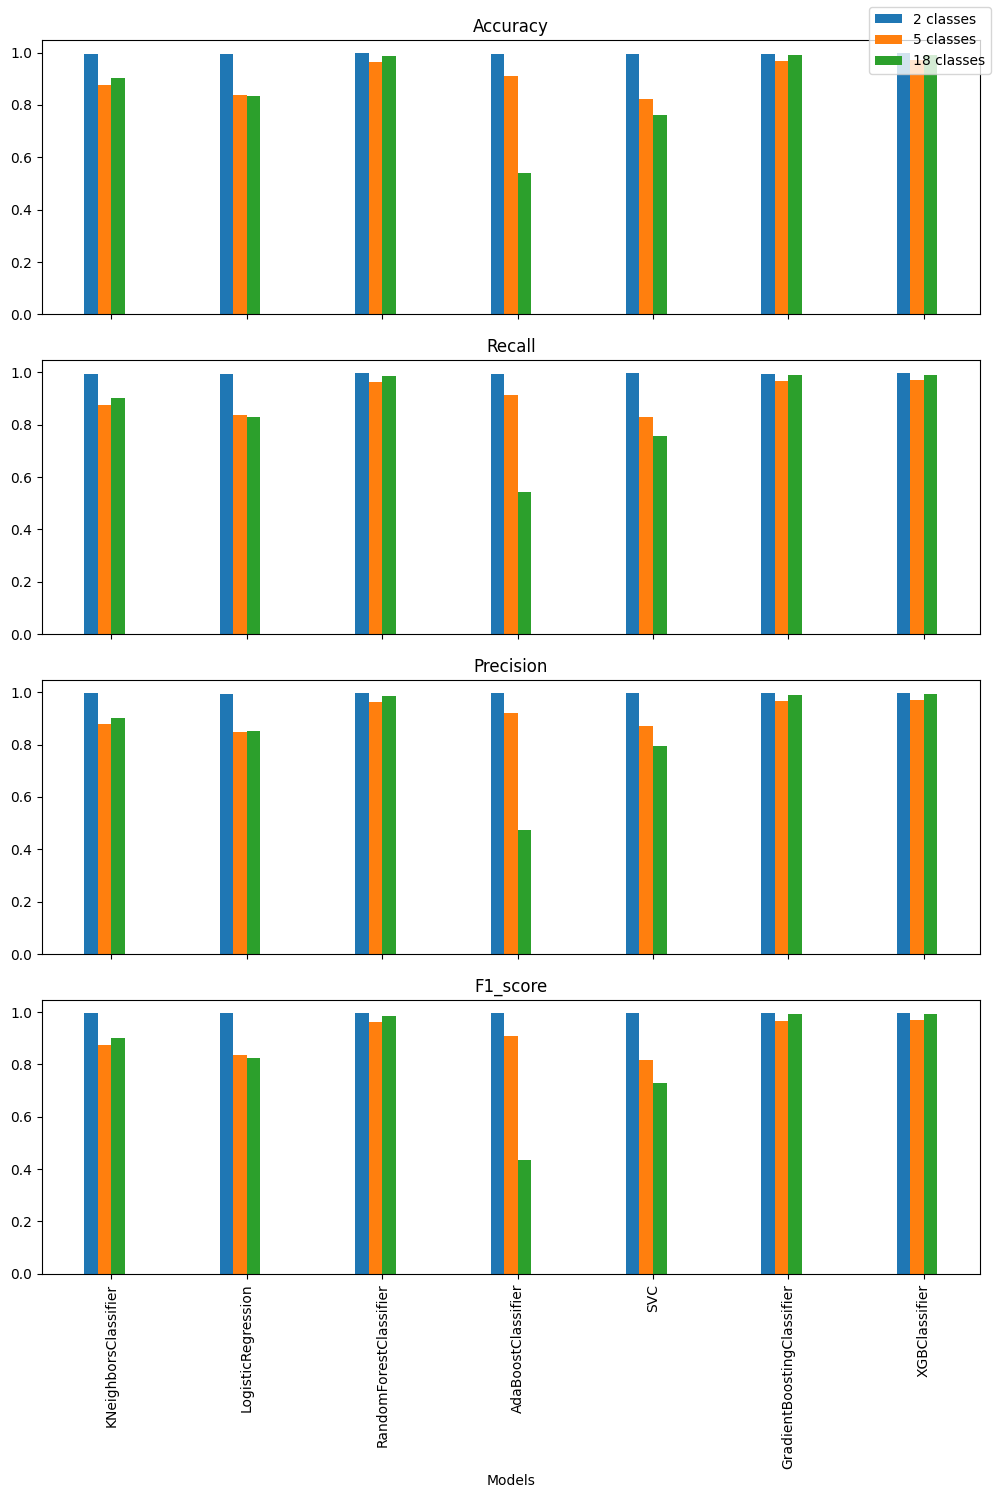

In [16]:
import matplotlib.pyplot as plt

# Assume combined_df is the DataFrame we constructed earlier
metrics = ['accuracy', 'recall', 'precision', 'f1_score']
class_categories = ['2 classes', '5 classes', '18 classes']

# Create subplots with a shared x-axis
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 15), sharex=True)

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics):
    for j, class_category in enumerate(class_categories):
        # Select the data for the class category and metric
        data = combined_df.loc[(class_category, metric)]
        # Create an offset for the bars to avoid overlap
        offset = (j - len(class_categories) / 2) * 0.1
        # Plot the data
        axs[i].bar([x + offset for x in range(len(data))], data, width=0.1, label=class_category)

    axs[i].set_title(metric.capitalize())
    axs[i].set_xticks(range(len(data)))
    axs[i].set_xticklabels(data.index, rotation=90)
    if i == len(metrics) - 1:  # Only the last subplot gets x-axis labels
        axs[i].set_xlabel('Models')

# Add a legend outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()
